##### RK
##### Ms. Pan
##### Intensive Data Science II

## 2010-2011 U.S. Store Sales of Morning Drinks Dataset

#### Table of Contents
##### 1. [Average Profit By State](#Average-Profit-By-State) 2. [Average Marketing By Region](#Average-Marketing-By-Region) 3. [Profit v.s. Marketing in Different Markets](#Profit-v.s.-Marketing-in-Different-Markets)

##### This project's goal is to analyze trends in U.S. Store Sales of morning drinks (like coffee, tea, etc.). This dataset is from Kaggle: https://www.kaggle.com/datasets/dsfelix/us-stores-sales.

### Findings

##### Profit by State: Profitability is distributed geographically somewhat unevenly, with high-profit states likely because of larger populations and a bigger consumer base.
##### Marketing by Region: There are differences exist in marketing across U.S. regions, with Western and Eastern regions investing more into marketing than Southern regions.
##### Profit vs. Marketing: The relationship between marketing and profit is significant, even though there is a somewhat low correlation between the two variables. There are stronger correlations in major markets than in smaller ones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("sales.csv")
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [3]:
# Average Profit By State

codes = pd.read_csv("StateAbbreviations.csv")
df_new = pd.merge(df, codes, how='left', left_on='State', right_on='States')

state_averages = df_new.groupby('Codes')['Profit'].mean().reset_index()

fig = px.choropleth(
    state_averages,
    color="Profit",
    locations="Codes",
    locationmode="USA-states",
    scope="usa",
    title="Average Profit by State",
  
)
fig.show()

#### Average Profit By State

##### The graph above displays a heatmap of the U.S. displaying the average profit made by the stores in each state. States with higher population and economic activity, like California, Illinois, New York, and Texas, have a higher average profit. This trend comes from factors like higher consumer spending on morning beverages, bigger customer bases, and more businesses/opportunities in those states. States with lower average profits most likely lack business and commercial centers. If I were to do this again, I would try to implement a dataset that also showed employment and see if there was any correlation between that and store sales of morning drinks.  Note: The grey states did not have enough data to gather an average profit.

In [4]:
# Average Marketing By Region

avg_profit = df.groupby("Market")["Marketing"].mean()
px.bar(avg_profit)

### Average Marketing By Region

##### Above is a histogram displaying the average marketing done in all regions of the U.S. (Central, East, South, and West). This visualization shows how there are  regions with disproportionately higher investments in marketing. For example, stores in the south invest a lot less on average in their marketing department than that of stores in western or eastern regions. This could be due to more business centers and, as I said in the heatmap of the U.S. above, a bigger customer base, causing businesses to have to spend more money on marketing due to more competition. I think, again, it would be interesting, or, more exciting to have data of population density or purchasing power. The data implies that different regions have different investments (on average) in marketing. Those factors definitely play a part in marketing investments, as well as profits.

Correlation for Major Market: r = 0.21, p-value = 0.0000
Correlation for Small Market: r = 0.16, p-value = 0.0000


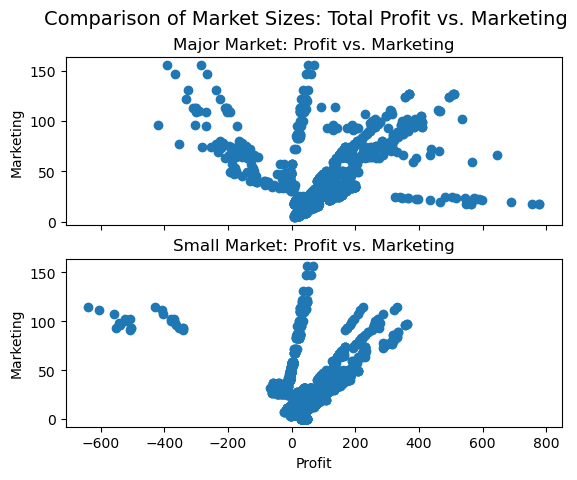

In [5]:
# Profit v.s. Marketing in Different Markets

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
major = df[df["Market Size"] == "Major Market"]

small = df[df["Market Size"] == "Small Market"]

ax1.set_title("Major Market: Profit vs. Marketing")
ax2.set_title("Small Market: Profit vs. Marketing")

ax1.set_ylabel("Marketing")
ax2.set_ylabel("Marketing")
ax2.set_xlabel("Profit")

fig.suptitle("Comparison of Market Sizes: Total Profit vs. Marketing", fontsize=14)
 
ax1.scatter(major["Profit"], major["Marketing"])
ax2.scatter(small["Profit"], small["Marketing"])

from scipy.stats import pearsonr

corr_major, p_major = pearsonr(major["Profit"], major["Marketing"])
corr_small, p_small = pearsonr(small["Profit"], small["Marketing"])

print("Correlation for Major Market: r = {:.2f}, p-value = {:.4f}".format(corr_major, p_major))
print("Correlation for Small Market: r = {:.2f}, p-value = {:.4f}".format(corr_small, p_small))

### Profit v.s. Marketing in Different Markets
##### The scatter plots above compare the relationship between marketing and profit, both in major markets and small markets. Visually, there is some linear relationship between marketing in profit in both markets. It was interesting to see that on both graphs, there were two linear correlations. However, this caused the r value to be low. There is a higher correlation in the major market (with an r of 0.21) than in the small market (with an r of 0.16). The p-value indicates that there is high significance between the two variables. The p-values for both cases are 0, displaying that the relationships are significant. This means that, even though the correlations are weak, they are unlikely to have occurred by chance. 

## Conclusion

##### The analysis of this dataset explores a lot of shop sales and the relationship between profits and investments in marketing. The intention of this analysis was to explore the effectiveness of marketing. It showed how both region and size of the market might affect both profit and investments in marketing. It showed that marketing in smaller markets might not be as effective as it could be in larger markets. I think that factors like population and general economic conditions do also have a big impact on both marketing and profits. Those factors are worth looking into in a future project. This analysis can be used to help businesses in evaluating their marketing investments, especially businesses that are in specific regions of the U.S. or ones that are in smaller markets.  








